In [55]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [56]:
dataset = pd.read_csv('E:/PyETL/vgg16_test/done/big_table/all_shoe_less.csv')
dataset = dataset.sort_values(['商品型號'], ascending=[True])
x1 = dataset.iloc[:,3].values
x1
# x2 = dataset.iloc[:,6].values
# x3 = dataset.iloc[:,9].values

array(['#393837', '#545354', '#2b2b2a', ..., '#857b7f', '#24242d',
       '#e2e1e3'], dtype=object)

In [57]:
# 處理 主要顏色欄位

rgb_color_list = []
for hex_color1 in x1:
    # 轉10進制
    rgb_color_list.append(list(int(hex_color1[i:i+2], 16) for i in (1, 3, 5)))
rgb_color_list
rgb_mcolor1 = []
rgb_mcolor2 = []
rgb_mcolor3 = []

## 抓RGB的R顏色
for i in range(len(rgb_color_list)):
    rgb_mcolor1.append(rgb_color_list[i][0]/255)
rgb_mcolor1

## 抓RGB的G顏色
for i in range(len(rgb_color_list)):
    rgb_mcolor2.append(rgb_color_list[i][1]/255)
rgb_mcolor2

## 抓RGB的B顏色
for i in range(len(rgb_color_list)):
    rgb_mcolor3.append(rgb_color_list[i][2]/255)
rgb_mcolor3


[0.21568627450980393,
 0.32941176470588235,
 0.16470588235294117,
 0.14901960784313725,
 0.12156862745098039,
 0.09803921568627451,
 0.07058823529411765,
 0.07450980392156863,
 0.7254901960784313,
 0.8745098039215686,
 0.08627450980392157,
 0.11372549019607843,
 0.3215686274509804,
 0.6392156862745098,
 0.6745098039215687,
 0.28627450980392155,
 0.27450980392156865,
 0.08235294117647059,
 0.18823529411764706,
 0.9176470588235294,
 0.5411764705882353,
 0.6823529411764706,
 0.33725490196078434,
 0.9176470588235294,
 0.11372549019607843,
 0.08627450980392157,
 0.15294117647058825,
 0.15294117647058825,
 0.6941176470588235,
 0.7372549019607844,
 0.6823529411764706,
 0.20784313725490197,
 0.09019607843137255,
 0.1411764705882353,
 0.796078431372549,
 0.796078431372549,
 0.6666666666666666,
 0.5372549019607843,
 0.09803921568627451,
 0.16862745098039217,
 0.09803921568627451,
 0.19607843137254902,
 0.16470588235294117,
 0.5529411764705883,
 0.16862745098039217,
 0.6196078431372549,
 0.462745

In [58]:
dataset.insert(2, "B", rgb_mcolor3)
dataset.insert(2, "G", rgb_mcolor2)
dataset.insert(2, "R", rgb_mcolor1)
dataset

,商品型號,商品網址,R,G,B,主要顏色名稱,主要顏色編號,主要顏色占比,次要顏色名稱,次要顏色編號,次要顏色占比,其他顏色名稱,其他顏色編號,其他顏色占比,商品照片,商品標題,品牌,男女款,價格,商品介紹
0,011040,https://www.adidas.com/us/world-cup-cleats/011...,0.223529,0.219608,0.215686,DarkSlateGray,#393837,0.599,WhiteSmoke,#ebebec,0.217,DarkGray,#9e9d9b,0.184,"https://assets.adidas.com/images/w_600,f_auto,...",adidas World Cup Cleats - Black | adidas US,adidas,A,160.0,Supportive comfort Cushioned ride Traction on ...
1,015110,https://www.adidas.com/us/copa-mundial-cleats/...,0.329412,0.325490,0.329412,DimGray,#545354,0.642,WhiteSmoke,#ebebec,0.245,DarkGray,#a0a09c,0.113,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Copa Mundial Cleats - Black | adidas US,adidas,A,150.0,Soft comfort Cushioned ride Traction on firm g...
2,019228,https://www.adidas.com/us/mundial-team-shoes/0...,0.168627,0.168627,0.164706,Black,#2b2b2a,0.631,WhiteSmoke,#e9e9eb,0.248,DimGray,#646263,0.122,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Mundial Team Shoes - Black | adidas US,adidas,M,95.0,Soft comfort Cushioned ride Traction on turf S...
3,019310,https://www.adidas.com/us/mundial-goal-shoes/0...,0.149020,0.149020,0.149020,Black,#262626,0.552,WhiteSmoke,#e8e8e9,0.280,DimGray,#6a6867,0.168,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Mundial Goal Shoes - Black | adidas US,adidas,M,95.0,The Mundial Goal has dominated soccer's greate...
4,034563,https://www.adidas.com/us/samba-classic/034563...,0.121569,0.117647,0.121569,Black,#1f1e1f,0.412,DimGray,#594844,0.299,WhiteSmoke,#e9eaeb,0.211,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Samba Classic - Black | adidas US,adidas,A,70.0,Getting up and down the field with speed is th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9201,WZANPWV,https://www.newbalance.com/pd/fresh-foam-zante...,0.823529,0.819608,0.831373,LightGray,#d2d1d4,0.704,DimGray,#5d5d64,0.260,DarkSlateBlue,#4f2548,0.025,https://nb.scene7.com/is/image/NB/wzanpwv_nb_0...,Fresh Foam Zante Pursuit,new balance,W,109.99,We packed our New Balance Fresh Foam Zante Pur...
9202,WZANSBB,https://www.newbalance.com/pd/fresh-foam-zante...,0.223529,0.223529,0.215686,DarkSlateGray,#393937,0.543,DarkGray,#9d9d9e,0.302,Gainsboro,#e0e0e3,0.155,https://nb.scene7.com/is/image/NB/wzansbb_nb_0...,Fresh Foam Zante Solas,new balance,W,99.99,Meet the newest member of the innovative New B...
9203,WZANSCS,https://www.newbalance.com/pd/fresh-foam-zante...,0.521569,0.482353,0.498039,Gray,#857b7f,0.544,WhiteSmoke,#f4f1f2,0.456,Gray,#857b7f,0.544,https://nb.scene7.com/is/image/NB/wzanscs_nb_0...,Fresh Foam Zante Solas,new balance,W,99.99,Meet the newest member of the innovative New B...
9204,WZANSLN,https://www.newbalance.com/pd/fresh-foam-zante...,0.141176,0.141176,0.176471,Black,#24242d,0.428,LightGray,#ccd0d5,0.281,DarkSlateGray,#2d5552,0.128,https://nb.scene7.com/is/image/NB/wzansln_nb_0...,Fresh Foam Zante Solas London Collection,new balance,W,99.99,Celebrate the Virgin Money London Marathon wit...


## K-means教學網站
#### https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203

In [59]:
# x = dataset.iloc[:, [2, 3, 4]].values
x = dataset.iloc[:, [2, 3, 4, 7]].values
x

array([[0.22352941, 0.21960784, 0.21568627, 0.599     ],
       [0.32941176, 0.3254902 , 0.32941176, 0.642     ],
       [0.16862745, 0.16862745, 0.16470588, 0.631     ],
       ...,
       [0.52156863, 0.48235294, 0.49803922, 0.544     ],
       [0.14117647, 0.14117647, 0.17647059, 0.428     ],
       [0.88627451, 0.88235294, 0.89019608, 0.335     ]])

In [44]:
from sklearn.cluster import KMeans
# cluster = KMeans(n_clusters=15)

from sklearn.metrics import silhouette_score
x1 = []
y1 = []
for k in range(2, 30):
    cluster = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster.fit(x)
    s = silhouette_score(x, cluster.labels_)
    x1.append(k)
    y1.append(s)
print("K choice:", x1)
print("Score:", y1)

K choice: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
Score: [0.7518435710945484, 0.6488520450507264, 0.5421331291952378, 0.531247943316546, 0.4872375101648899, 0.45987779038365145, 0.46347149243317204, 0.4703199680504267, 0.4497521905204986, 0.4367279131129534, 0.4420262932785906, 0.42674347462152323, 0.4119662151729774, 0.4146854401793577, 0.41266700178553856, 0.42076625875745494, 0.40397315976170195, 0.4056021642760469, 0.3947879641597094, 0.3811350832330529, 0.384368226679666, 0.3842412134873667, 0.37590301417322597, 0.3886038689600401, 0.36603292612575666, 0.3675853237193001, 0.3843342254391816, 0.3876649576543853]


In [45]:
wcss = []
for i in range(2, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 30), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(x)
plt.scatter(x[:,0], x[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

AttributeError: 'NoneType' object has no attribute 'sqrt'

In [67]:
d = dataset[["R", "G", "B"]]
# d = dataset[["R", "G", "B", "主要顏色占比"]]
d

,R,G,B
0,0.223529,0.219608,0.215686
1,0.329412,0.325490,0.329412
2,0.168627,0.168627,0.164706
3,0.149020,0.149020,0.149020
4,0.121569,0.117647,0.121569
...,...,...,...
9201,0.823529,0.819608,0.831373
9202,0.223529,0.223529,0.215686
9203,0.521569,0.482353,0.498039
9204,0.141176,0.141176,0.176471


<Figure size 432x288 with 0 Axes>

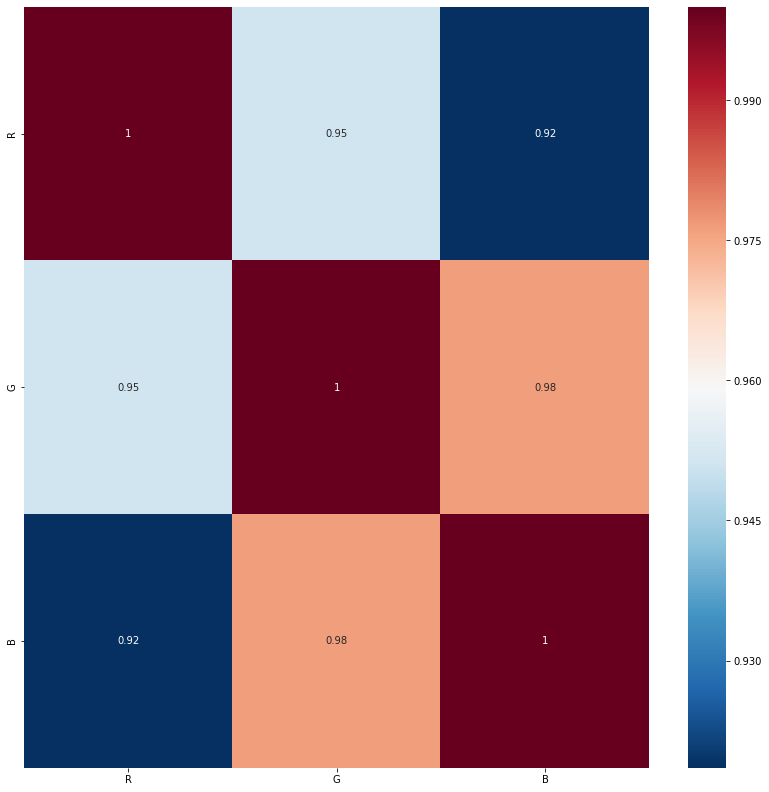

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure()


plt.figure(figsize=(14, 14))
sns.heatmap(d.corr(),
           annot=True,
           cmap="RdBu_r")

<IPython.core.display.Javascript object>


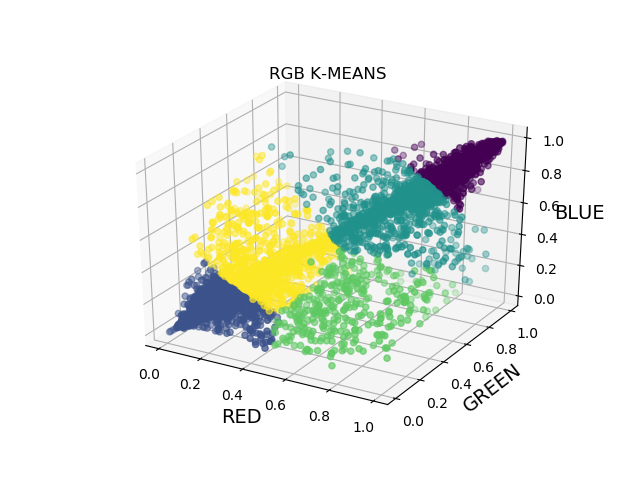

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

In [49]:
from sklearn import datasets
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
## 讓3d圖可旋轉
%matplotlib notebook


kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(x)
labels = kmeans.predict(x)

fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')
ColorsA=plt.cm.viridis(np.linspace(0, 1,len(set(labels))),alpha=0.8) #Equally spaced color 

ax.set_title("RGB K-MEANS")
ax.set_xlabel('RED', fontsize=14)
ax.set_ylabel('GREEN', fontsize=14)
ax.set_zlabel('BLUE', fontsize=14)
for i in range(len(set(labels))): #Labels of the clusters 
    xL=[]
    yL=[]
    zL=[]
    for k in range(len(x)):
        if labels[k]==i: #Data points of each cluster 
            xL.append(rgb_mcolor1[k])
            yL.append(rgb_mcolor2[k])
            zL.append(rgb_mcolor3[k])

    ax.scatter(xL,yL,zL,c=ColorsA[i],)
    


In [50]:
kmeans.labels_

array([1, 4, 1, ..., 2, 1, 0])

In [51]:
import os
path = "E:/PyETL/vgg16_test/done/big_table/all_pics/" #資料夾目錄
files= os.listdir(path) #得到資料夾下的所有檔名稱
files

['011040.jpg',
 '015110.jpg',
 '019228.jpg',
 '019310.jpg',
 '034563.jpg',
 '100007_BKW.jpg',
 '100013_BKLD.jpg',
 '100026_BBK.jpg',
 '100026_NAT.jpg',
 '100084_GUN.jpg',
 '1011A002-001.jpg',
 '1011A002-002.jpg',
 '1011A002-020.jpg',
 '1011A002-021.jpg',
 '1011A002-400.jpg',
 '1011A002-401.jpg',
 '1011A008-001.jpg',
 '1011A008-002.jpg',
 '1011A008-003.jpg',
 '1011A008-020.jpg',
 '1011A008-021.jpg',
 '1011A008-400.jpg',
 '1011A008-600.jpg',
 '1011A014-020.jpg',
 '1011A019-001.jpg',
 '1011A019-002.jpg',
 '1011A019-004.jpg',
 '1011A019-020.jpg',
 '1011A019-021.jpg',
 '1011A019-022.jpg',
 '1011A019-300.jpg',
 '1011A019-400.jpg',
 '1011A021-001.jpg',
 '1011A022-001.jpg',
 '1011A023-021.jpg',
 '1011A029-021.jpg',
 '1011A030-001.jpg',
 '1011A038-021.jpg',
 '1011A041-001.jpg',
 '1011A041-021.jpg',
 '1011A042-001.jpg',
 '1011A042-003.jpg',
 '1011A042-004.jpg',
 '1011A042-020.jpg',
 '1011A042-021.jpg',
 '1011A042-400.jpg',
 '1011A042-403.jpg',
 '1011A045-002.jpg',
 '1011A131-002.jpg',
 '1011A131

In [52]:
import os, shutil
dp = 'E:/PyETL/color_cluster/K-MEANS/RGB/maj/'
for i in range(len(labels)):
    if not os.path.exists(dp + str(labels[i])):
        os.makedirs(dp + str(labels[i]))
    path = dp + str(labels[i])
    shutil.copyfile("E:/PyETL/vgg16_test/done/big_table/all_pics/" + files[i], path + '/' + files[i])


# import os, shutil
# dp = 'E:/PyETL/color_cluster/K-MEANS/RGB/maj_pa/'
# for i in range(len(labels)):
#     if not os.path.exists(dp + str(labels[i])):
#         os.makedirs(dp + str(labels[i]))
#     path = dp + str(labels[i])
#     shutil.copyfile("E:/PyETL/vgg16_test/done/big_table/all_pics/" + files[i], path + '/' + files[i])

### 透過RGB的分類結果 我們來看是否能解釋HSV

In [26]:
def rgb_to_hsv(r, g, b):
    r, g, b = r/255.0, g/255.0, b/255.0
    mx = max(r, g, b)
    mn = min(r, g, b)
    df = mx-mn
    if mx == mn:
        h = 0
    elif mx == r:
        h = (60 * ((g-b)/df) + 360) % 360
    elif mx == g:
        h = (60 * ((b-r)/df) + 120) % 360
    elif mx == b:
        h = (60 * ((r-g)/df) + 240) % 360
    if mx == 0:
        s = 0
    else:
        s = (df/mx)*100
    v = mx*100
    return h, s, v

print(rgb_to_hsv(255, 255, 255))
print(rgb_to_hsv(0, 215, 0))

(0, 0.0, 100.0)
(120.0, 100.0, 84.31372549019608)


In [27]:
import math
hsv_mcolor1 = []
hsv_mcolor2 = []
hsv_mcolor3 = []

for i in range(len(rgb_color_list)):
    h, s, v = rgb_to_hsv(rgb_color_list[i][0], rgb_color_list[i][1], rgb_color_list[i][2])
    h = math.cos(h*math.pi/180)
    h = (h+1)/2
    s = s/100
    v = v / 100
    hsv_mcolor1.append(h)
    hsv_mcolor2.append(s)
    hsv_mcolor3.append(v)
hsv_mcolor1

[0.9330127018922199,
 0.75,
 0.75,
 1.0,
 0.75,
 0.9330127018922199,
 1.0,
 0.13347406408508689,
 0.14644660940672616,
 1.0,
 0.11697777844051138,
 0.03015368960704584,
 0.75,
 0.24999999999999978,
 0.11697777844051127,
 1.0,
 0.24999999999999978,
 0.9698463103929544,
 0.116977778440511,
 1.0,
 0.49999999999999634,
 0.010926199633096989,
 1.0,
 1.0,
 0.24999999999999978,
 0.02221359710692944,
 0.75,
 0.4999999999999999,
 0.24999999999999978,
 1.0,
 0.9994463222840746,
 0.5868240888334653,
 0.9924038765061041,
 0.24999999999999978,
 0.24999999999999978,
 0.75,
 0.2922924934990564,
 0.116977778440511,
 0.4999999999999999,
 0.24999999999999978,
 0.24999999999999978,
 0.959989721829412,
 0.0,
 0.75,
 0.24999999999999978,
 0.19561928549563956,
 0.9990019947698863,
 0.9829629131445343,
 0.11697777844050883,
 1.0,
 0.11697777844051194,
 0.24999999999999978,
 0.24999999999999978,
 0.06698729810778115,
 0.75,
 0.24999999999999978,
 1.0,
 0.14644660940672588,
 1.0,
 0.8117449009293682,
 0.249999

<IPython.core.display.Javascript object>


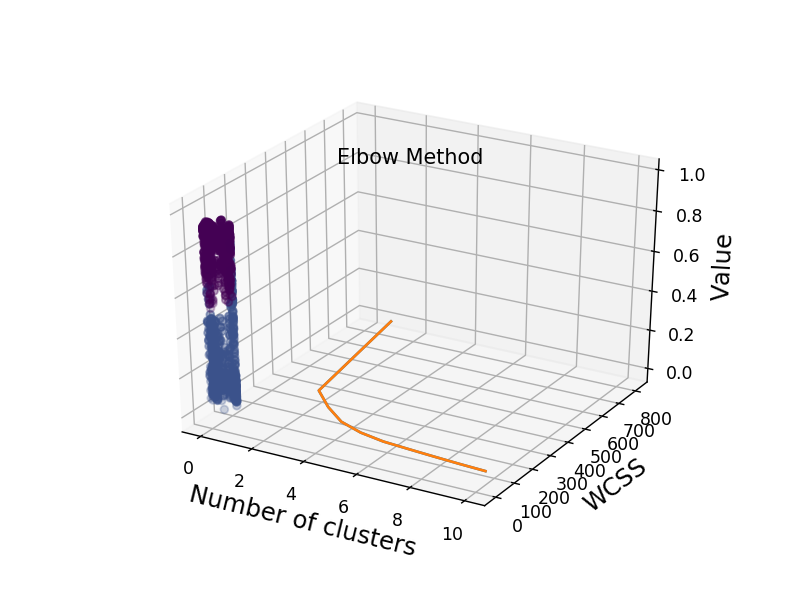

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

In [18]:
from sklearn import datasets
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
## 讓3d圖可旋轉
%matplotlib notebook


# kmeans = KMeans(n_clusters=2)
# kmeans = kmeans.fit(x)
# labels = kmeans.predict(x)

fig=plt.figure('RGB K-MEANS Labels in HSV')
ax = fig.add_subplot(111, projection='3d')
ColorsA=plt.cm.viridis(np.linspace(0, 1,5),alpha=0.8) #Equally spaced color 

ax.set_title("")
ax.set_xlabel('Hue', fontsize=14)
ax.set_ylabel('Saturation', fontsize=14)
ax.set_zlabel('Value', fontsize=14)

for i in range(5): #Labels of the clusters 
    xL=[]
    yL=[]
    zL=[]
    for k in range(len(x)):
        if labels[k]==i: #Data points of each cluster 
            xL.append(hsv_mcolor1[k])
            yL.append(hsv_mcolor2[k])
            zL.append(hsv_mcolor3[k])

    ax.scatter(xL,yL,zL,c=ColorsA[i])

In [28]:
dataset.insert(2, "V", hsv_mcolor3)
dataset.insert(2, "S", hsv_mcolor2)
dataset.insert(2, "H", hsv_mcolor1)
dataset

,商品型號,商品網址,H,S,V,R,G,B,主要顏色名稱,主要顏色編號,...,次要顏色占比,其他顏色名稱,其他顏色編號,其他顏色占比,商品照片,商品標題,品牌,男女款,價格,商品介紹
0,011040,https://www.adidas.com/us/world-cup-cleats/011...,0.933013,0.035088,0.223529,0.223529,0.219608,0.215686,DarkSlateGray,#393837,...,0.217,DarkGray,#9e9d9b,0.184,"https://assets.adidas.com/images/w_600,f_auto,...",adidas World Cup Cleats - Black | adidas US,adidas,U,160,Supportive comfort Cushioned ride Traction on ...
1,015110,https://www.adidas.com/us/copa-mundial-cleats/...,0.750000,0.011905,0.329412,0.329412,0.325490,0.329412,DimGray,#545354,...,0.245,DarkGray,#a0a09c,0.113,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Copa Mundial Cleats - Black | adidas US,adidas,U,150,Soft comfort Cushioned ride Traction on firm g...
2,019228,https://www.adidas.com/us/mundial-team-shoes/0...,0.750000,0.023256,0.168627,0.168627,0.168627,0.164706,Black,#2b2b2a,...,0.248,DimGray,#646263,0.122,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Mundial Team Shoes - Black | adidas US,adidas,M,95,Soft comfort Cushioned ride Traction on turf S...
3,019310,https://www.adidas.com/us/mundial-goal-shoes/0...,1.000000,0.000000,0.149020,0.149020,0.149020,0.149020,Black,#262626,...,0.280,DimGray,#6a6867,0.168,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Mundial Goal Shoes - Black | adidas US,adidas,M,95,The Mundial Goal has dominated soccer's greate...
4,034563,https://www.adidas.com/us/samba-classic/034563...,0.750000,0.032258,0.121569,0.121569,0.117647,0.121569,Black,#1f1e1f,...,0.299,WhiteSmoke,#e9eaeb,0.211,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Samba Classic - Black | adidas US,adidas,U,70,Getting up and down the field with speed is th...
5,280647,https://www.adidas.com/us/adilette-slides/2806...,0.933013,0.042553,0.184314,0.184314,0.180392,0.176471,DarkSlateGray,#2f2e2d,...,0.280,NaN,NaN,NaN,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Adilette Slides - Black | adidas US,adidas,M,45,The Adilette debuted in 1972 as a poolside sli...
6,280648,https://www.adidas.com/us/adilette-slides/2806...,1.000000,0.000000,0.921569,0.921569,0.921569,0.921569,WhiteSmoke,#ebebeb,...,0.124,DarkGray,#a3a3a2,0.074,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Adilette Slides - White | adidas US,adidas,M,45,The Adilette debuted in 1972 as a poolside sli...
7,288022,https://www.adidas.com/us/adilette-slides/2880...,0.133474,0.304348,0.180392,0.125490,0.141176,0.180392,Black,#20242e,...,0.292,NaN,NaN,NaN,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Adilette Slides - Blue | adidas US,adidas,M,45,The Adilette debuted in 1972 as a poolside sli...
8,772109,https://www.adidas.com/us/samba-classic-shoes/...,0.146447,0.017167,0.913725,0.898039,0.901961,0.913725,Gainsboro,#e5e6e9,...,0.357,NaN,NaN,NaN,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Samba Classic Shoes - White | adidas US,adidas,U,70,"A shoe that is synonymous with adidas, the Sam..."
9,807295,https://www.adidas.com/us/gsg-9.2-boots/807295...,1.000000,0.000000,0.137255,0.137255,0.137255,0.137255,Black,#232323,...,0.094,WhiteSmoke,#ececee,0.074,"https://assets.adidas.com/images/w_600,f_auto,...",adidas GSG 9.2 Boots - Black | adidas US,adidas,U,190,These men's outdoor boots have been depended u...


In [29]:
x = dataset.iloc[:, [2, 3, 4, 5, 6, 7, 10]].values
x

array([[0.9330127 , 0.03508772, 0.22352941, ..., 0.21960784, 0.21568627,
        0.599     ],
       [0.75      , 0.01190476, 0.32941176, ..., 0.3254902 , 0.32941176,
        0.642     ],
       [0.75      , 0.02325581, 0.16862745, ..., 0.16862745, 0.16470588,
        0.631     ],
       ...,
       [1.        , 0.02222222, 0.17647059, ..., 0.17254902, 0.17254902,
        0.834     ],
       [0.11697778, 0.01282051, 0.91764706, ..., 0.90980392, 0.91764706,
        0.937     ],
       [0.25      , 0.01239669, 0.94901961, ..., 0.9372549 , 0.94901961,
        0.889     ]])

In [30]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<IPython.core.display.Javascript object>


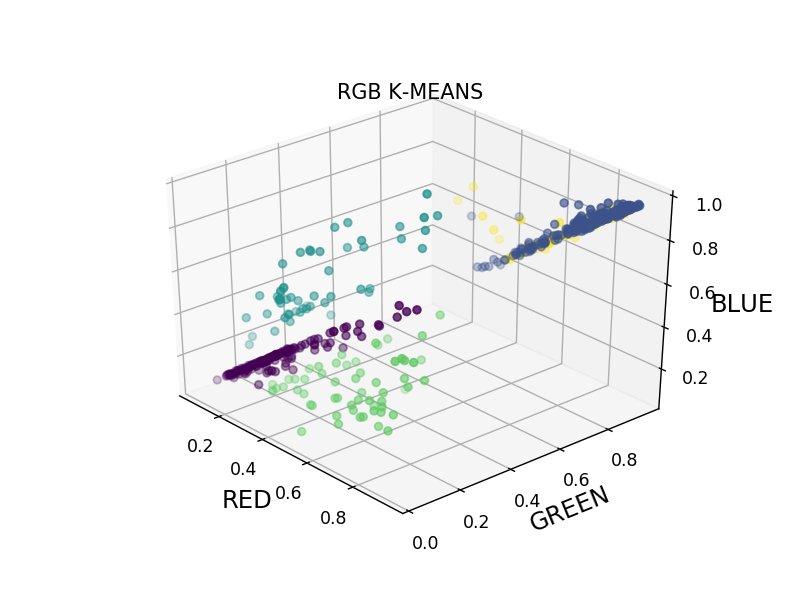

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

In [31]:
from sklearn import datasets
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
## 讓3d圖可旋轉
%matplotlib notebook


kmeans = KMeans(n_clusters=10)
kmeans = kmeans.fit(x)
labels = kmeans.predict(x)

fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')
ColorsA=plt.cm.viridis(np.linspace(0, 1, len(set(labels)))),alpha=0.8) #Equally spaced color 

ax.set_title("RGB K-MEANS")
ax.set_xlabel('RED', fontsize=14)
ax.set_ylabel('GREEN', fontsize=14)
ax.set_zlabel('BLUE', fontsize=14)
for i in range(5): #Labels of the clusters 
    xL=[]
    yL=[]
    zL=[]
    for k in range(len(x)):
        if labels[k]==i: #Data points of each cluster 
            xL.append(rgb_mcolor1[k])
            yL.append(rgb_mcolor2[k])
            zL.append(rgb_mcolor3[k])

    ax.scatter(xL,yL,zL,c=ColorsA[i],)

<IPython.core.display.Javascript object>


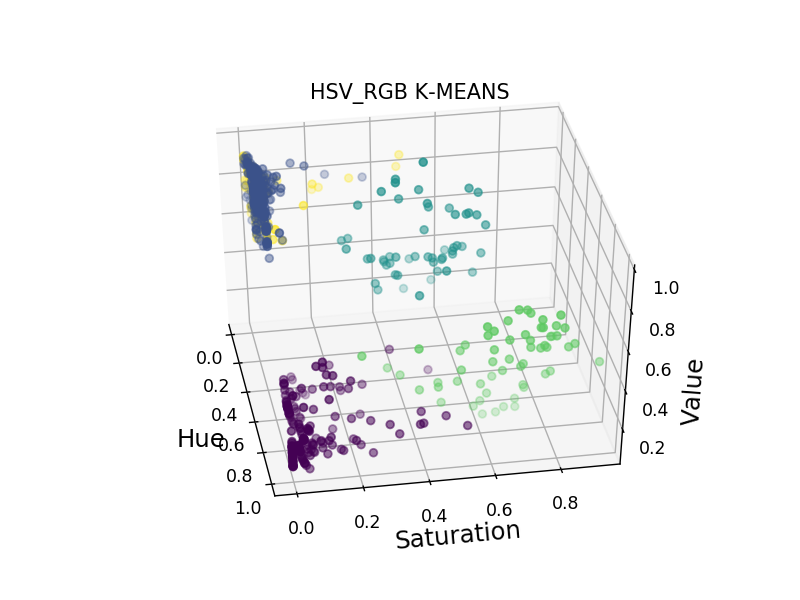

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

In [32]:
fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')
ColorsA=plt.cm.viridis(np.linspace(0, 1,5),alpha=0.8) #Equally spaced color 

ax.set_title("HSV_RGB K-MEANS")
ax.set_xlabel('Hue', fontsize=14)
ax.set_ylabel('Saturation', fontsize=14)
ax.set_zlabel('Value', fontsize=14)
for i in range(5): #Labels of the clusters 
    xL=[]
    yL=[]
    zL=[]
    for k in range(len(x)):
        if labels[k]==i: #Data points of each cluster 
            xL.append(hsv_mcolor1[k])
            yL.append(hsv_mcolor2[k])
            zL.append(hsv_mcolor3[k])

    ax.scatter(xL,yL,zL,c=ColorsA[i],)

In [33]:
kmeans.labels_

array([0, 0, 0, ..., 0, 1, 1])

In [34]:
import os
path = "D:/PyETL/adidas/men/pictures/" #資料夾目錄
files= os.listdir(path) #得到資料夾下的所有檔名稱
files

['011040.jpg',
 '015110.jpg',
 '019228.jpg',
 '019310.jpg',
 '034563.jpg',
 '280647.jpg',
 '280648.jpg',
 '288022.jpg',
 '772109.jpg',
 '807295.jpg',
 'AC6977.jpg',
 'AC6978.jpg',
 'AC7655.jpg',
 'AC7660.jpg',
 'AC7772.jpg',
 'AC7828.jpg',
 'AC7841.jpg',
 'AC7856.jpg',
 'AC7859.jpg',
 'AC8229.jpg',
 'AC8230.jpg',
 'AC8262.jpg',
 'AC8356.jpg',
 'AC8364.jpg',
 'AC8397.jpg',
 'AC8597.jpg',
 'AF5666.jpg',
 'AH2324.jpg',
 'AH2455.jpg',
 'AP9971.jpg',
 'AQ0098.jpg',
 'AQ0099.jpg',
 'AQ0104.jpg',
 'AQ0138.jpg',
 'AQ0154.jpg',
 'AQ0158.jpg',
 'AQ0162.jpg',
 'AQ0321.jpg',
 'AQ0365.jpg',
 'AQ0863.jpg',
 'AQ1135.jpg',
 'AQ1180.jpg',
 'AQ1261.jpg',
 'AQ1701.jpg',
 'AQ1702.jpg',
 'AQ1703.jpg',
 'AQ1705.jpg',
 'AQ8528.jpg',
 'AQ8530.jpg',
 'AQ8531.jpg',
 'B22703.jpg',
 'B22705.jpg',
 'B22706.jpg',
 'B22713.jpg',
 'B22716.jpg',
 'B22767.jpg',
 'B22771.jpg',
 'B27136.jpg',
 'B27140.jpg',
 'B27904.jpg',
 'B27975.jpg',
 'B34429.jpg',
 'B37173.jpg',
 'B37174.jpg',
 'B37175.jpg',
 'B37227.jpg',
 'B37312.j

In [35]:
import os, shutil
for i in range(len(kmeans.labels_)):
    if not os.path.exists("D:/k-means_rgb_hsv/" + str(kmeans.labels_[i])):
        os.makedirs("D:/k-means_rgb_hsv/" + str(kmeans.labels_[i]))
    path = 'D:/k-means_rgb_hsv/' + str(kmeans.labels_[i])
    shutil.copyfile("D:/PyETL/adidas/men/pictures/" + files[i], path + '/' + files[i])